## Questions

1) Delivery_time -> Predict delivery time using sorting time 

2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## Answer 1

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the delivery time file

time = pd.read_csv('delivery_time.csv')
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
# Define features and targets

target = time[['Delivery Time']]
feature = time[['Sorting Time']]

In [4]:
from sklearn.model_selection import train_test_split

# Split into train and test
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.7,random_state=10)

In [5]:
# Perform simple linear regression for model prediction
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# Train the model
reg.fit(x_train, y_train)


LinearRegression()

In [6]:
# Testing the validation

y_pred = reg.predict(x_test)
y_pred

array([[13.03495468],
       [16.89353474],
       [16.89353474],
       [14.32114804],
       [13.03495468],
       [11.74876133],
       [20.7521148 ]])

In [7]:
# Calculate error in prediction
err = y_test - y_pred
err

,Delivery Time
14,-1.004955
5,-1.543535
2,2.856465
11,-3.571148
7,-3.534955
18,-3.748761
3,3.247885


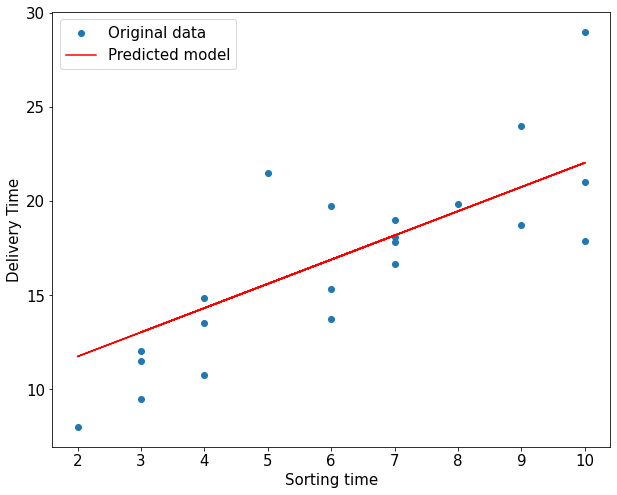

In [8]:
# Plot the original vs predicted model to check model efficiency

plt.figure(figsize = (10, 8))
plt.scatter(time['Sorting Time'], time['Delivery Time'], label = 'Original data')
plt.xlabel('Sorting time', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Delivery Time', fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(time['Sorting Time'], reg.predict(time[['Sorting Time']]), color = 'red', label = 'Predicted model')
plt.legend(fontsize = 15)
plt.show()

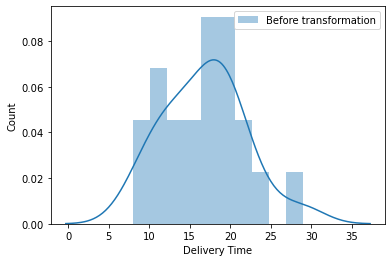

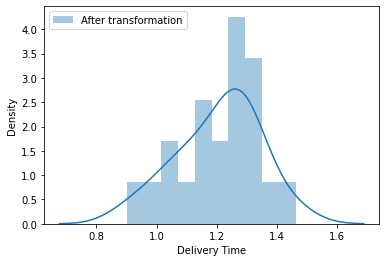

In [45]:
import warnings
warnings.filterwarnings("ignore")
# Perform various transformation techniques and compare with original data

# log transformation

sns.distplot(time['Delivery Time'], bins = 10, kde = True, label = 'Before transformation')
plt.xlabel('Delivery Time')
plt.ylabel('Count')
plt.legend()
plt.show()

sns.distplot(np.log10(time['Delivery Time']), bins = 10, kde = True, label = 'After transformation')
plt.legend()


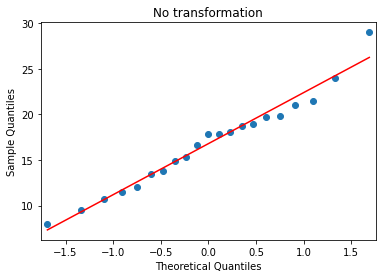

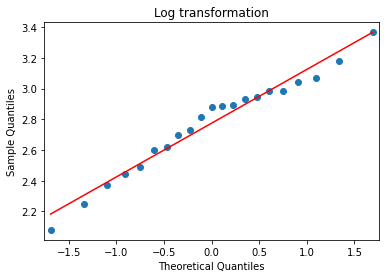

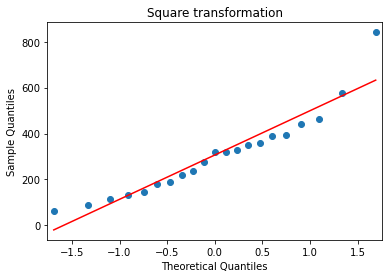

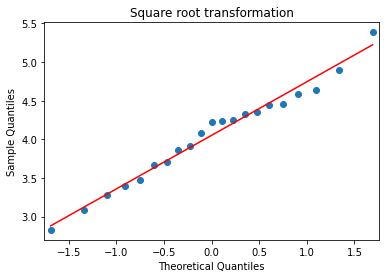

In [48]:
import statsmodels.api as smf

smf.qqplot(time['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(time['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(time['Delivery Time']**2, line = 'r')
plt.title('Square transformation')
smf.qqplot(np.sqrt(time['Delivery Time']), line = 'r')
plt.title('Square root transformation')
plt.show()

In [62]:
# Find root mean square values using OLS regression technique

time.rename(columns = {'Delivery Time':'deliverytime', 'Sorting Time':'sortingtime'}, inplace=True)

import statsmodels.formula.api as sm
model = sm.ols('deliverytime~sortingtime', data = time).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        17:03:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model_log = sm.ols('np.log(deliverytime)~np.log(sortingtime)', data = time).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Sat, 30 Mar 2024   Prob (F-statistic):           1.60e-07
Time:                          17:03:54   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sortingtime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model_sq = sm.ols('(deliverytime)**2~(sortingtime)**2', data = time).fit()
model_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        17:04:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model_sqrt = sm.ols('np.sqrt(deliverytime)~np.sqrt(sortingtime)', data = time).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(deliverytime)   R-squared:                       0.729
Model:                               OLS   Adj. R-squared:                  0.715
Method:                    Least Squares   F-statistic:                     51.16
Date:                   Sat, 30 Mar 2024   Prob (F-statistic):           8.48e-07
Time:                           17:05:08   Log-Likelihood:                -5.7320
No. Observations:                     21   AIC:                             15.46
Df Residuals:                         19   BIC:                             17.55
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sortingtime)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
from sklearn.metrics import mean_squared_error

model1_pred_y =np.square(model_log.predict(time['sortingtime']))
model2_pred_y =pow(model_sq.predict(time['sortingtime']),3)
model3_pred_y =np.exp(model_sqrt.predict(time['sortingtime']))

In [69]:
model1_rmse =np.sqrt(mean_squared_error(time['deliverytime'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(time['deliverytime'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(time['deliverytime'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.934903768890139 
model1= 9.788370539515602 
model2= 6681.473742776617 
model3= 55.87435675535495


In [70]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

## Answer 2

In [9]:
# Reading the salary hike file

sal = pd.read_csv('Salary_Data.csv')
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [10]:
# Define features and targets
feature = sal[['YearsExperience']]
target = sal[['Salary']]

In [11]:
# Split into train and test
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.7,random_state=10)

In [12]:
# Perform simple linear regression for model prediction

reg = LinearRegression()

# Train the model
reg.fit(x_train, y_train)

LinearRegression()

In [13]:
# Testing the validation

y_pred = reg.predict(x_test)
y_pred

array([[ 90473.3523603 ],
       [ 56979.09876522],
       [ 54187.91096563],
       [ 41162.36790088],
       [ 45814.34756686],
       [ 93264.54015989],
       [ 65352.66216399],
       [116524.43848981],
       [ 64422.2662308 ]])

In [14]:
# Calculate error in prediction
err = y_test - y_pred
err

,Salary
20,1264.647640
7,-2534.098765
5,2454.089034
2,-3431.367901
3,-2289.347567
21,5008.459840
13,-8271.662164
27,-3889.438490
12,-7465.266231


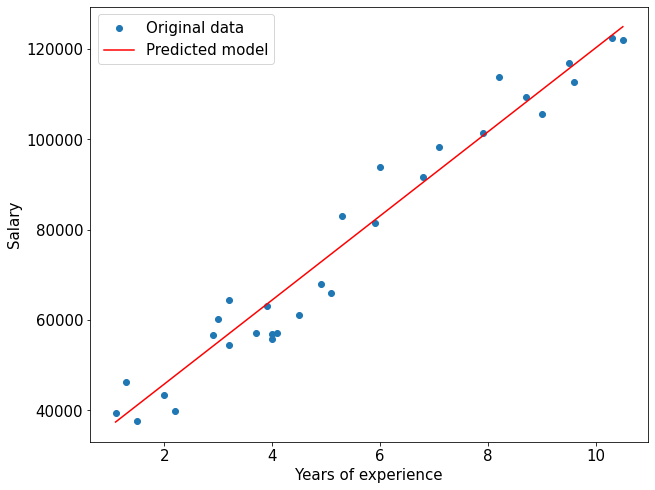

In [15]:
# Plot the original vs predicted model to check model efficiency

plt.figure(figsize = (10, 8))
plt.scatter(sal['YearsExperience'], sal['Salary'], label = 'Original data')
plt.xlabel('Years of experience', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Salary', fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(sal['YearsExperience'], reg.predict(sal[['YearsExperience']]), color = 'red', label = 'Predicted model')
plt.legend(fontsize = 15)
plt.show()

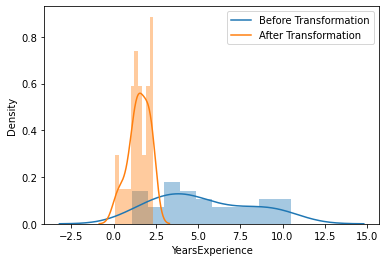

In [76]:
# Performing various trnasformation techniques

labels = ['Before Transformation','After Transformation']
sns.distplot(sal['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(sal['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

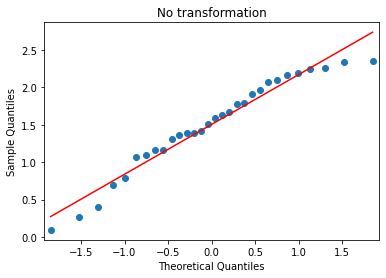

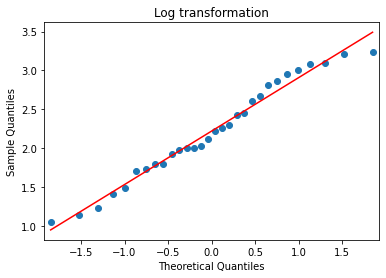

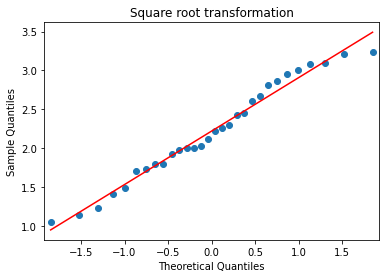

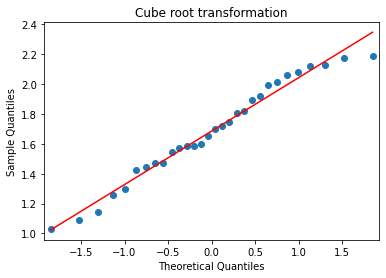

In [77]:
smf.qqplot(np.log(sal['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(sal['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(sal['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(sal['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [79]:
model = sm.ols('Salary~YearsExperience', data = sal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        17:21:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = sal).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           7.58e-19
Time:                        17:21:37   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = sal).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           6.37e-18
Time:                        17:21:52   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = sal).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           7.40e-16
Time:                        17:22:16   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
model1_pred_y =np.square(model1.predict(sal['YearsExperience']))
model2_pred_y =pow(model2.predict(sal['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(sal['YearsExperience']))

model1_rmse =np.sqrt(mean_squared_error(sal['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(sal['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(sal['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174309 
model2= 6232.815455835842 
model3= 7219.716974372806


In [84]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'